Linguist 278: Programming for Linguists<br />
Stanford Linguistics, Fall 2020<br />
Christopher Potts<br />

# Assignment 6

Distributed 2020-10-26<br />
Due 2020-11-02

Please submit a modified version of this file with the exercise functions completed. You can add as many new cells as you want, but __please make sure there are no function calls in the cells containing your implementations of the exercises__.

In [1]:
%matplotlib inline
import pandas as pd

## Questions

* [1. Reading in the Concreteness dataset [1 point]](#1.-Reading-in-the-Concreteness-dataset-[1-point])
* [2. Multidimensional sorting [1 point]](#2.-Multidimensional-sorting-[1-point])
* [3. Unigram vs. bigram distribution [1 point]](#3.-Unigram-vs.-bigram-distribution-[1-point])
* [4. Barplot of the distribution of part-of-speech values [1 point]](#4.-Barplot-of-the-distribution-of-part-of-speech-values-[1-point])
* [5. Subframe of above-average concreteness values [2 points]](#5.-Subframe-of-above-average-concreteness-values-[2-points])
* [6. Recalculating 'Percent_known'  [2 points]](#6.-Recalculating-'Percent_known'--[2-points])
* [7. Grouping by part-of-speech  [2 points]](#7.-Grouping-by-part-of-speech--[2-points])

## 1. Reading in the Concreteness dataset [1 point]

[Brysbaert et al. 2014](http://crr.ugent.be/papers/Brysbaert_Warriner_Kuperman_BRM_Concreteness_ratings.pdf) released a dataset of "concreteness ratings for 40 thousand generally known English word lemmas". The dataset is available from this link:

http://www.humanities.mcmaster.ca/~vickup/Concreteness_ratings_Brysbaert_et_al_BRM.csv

Here is an overview of the columns and their meanings:

0. `Word`: The word (str; the keys in the dict/JSON)
1. `Bigram`: Whether it is a single word or a two-word expression
2. `Conc.M`: The mean concreteness rating
3. `Conc.SD`: The standard deviation of the concreteness ratings (float)
4. `Unknown`: The number of persons indicating they did not know the word
5. `Total`: The total number of persons who rated the word
6. `Percent_known`: Percentage of participants who knew the word
7. `SUBTLEX`: The SUBTLEX-US frequency count
8. `Dom_Pos`: The part-of-speech where known

__Your tasks__: In separate cells below this one, use pandas to 

1. Download this lexicon CSV file and put it in the same directory as this notebook. Please do not change the name of the file.
1. Read the file into a `pd.DataFrame` called `conc_df` with column 0 as the index.
1. View the first 10 lines of `conc_df`. (This is a basic method of `pd.DataFrame` – no need to write original code.)
1. Write a command that returns the row and column counts of `conc_df` as a tuple. (This too is a basic method of `pd.DataFrame`.)

In [8]:
## TO BE COMPLETED ##
import pandas as pd
conc_df = pd.read_csv('Concreteness_ratings_Brysbaert_et_al_BRM.csv', index_col = 0)
conc_df.head(10)



,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
Word,,,,,,,,
roadsweeper,0,4.85,0.37,1,27,0.96,0,0
traindriver,0,4.54,0.71,3,29,0.90,0,0
tush,0,4.45,1.01,3,25,0.88,66,0
hairdress,0,3.93,1.28,0,29,1.00,1,0
pharmaceutics,0,3.77,1.41,4,26,0.85,0,0
hoover,0,3.76,1.23,4,29,0.86,162,0
shopkeeping,0,3.18,1.19,1,29,0.97,0,0
pushiness,0,2.48,1.24,1,30,0.97,0,0
underdevelop,0,2.37,1.40,0,30,1.00,0,0


In [7]:
## TO BE COMPLETED ##
conc_df.shape

(39954, 8)

In [ ]:
## TO BE COMPLETED ##
pass

## 2. Multidimensional sorting [1 point]

Write a single line of code that returns a version of `conc_df` which is sorted primarily by `'Percent_known'`, largest to smallest, and by `'Conc.M'`, smallest to largest. Store the output in a variable called `sorted_df`. You can use `test_multidimensional_sorting` to test that you're sorting in the required way.

__Hint__: as you can see in the class notes, `sort_values` can take lists of column names as an argument. The same is true of the `ascending` keyword argument to `sort_values`.

In [19]:
## TO BE COMPLETED 
sorted_df = conc_df.sort_values(['Percent_known','Conc.M'], ascending=[False, True], inplace=False)

In [20]:
def test_multidimensional_sorting(sorted_df):
    """If you capture the output of your sorting in a dataframe
    and feed it into this function, it will run a basic test
    on that dataframe.

    """
    expected = ['although', 'spirituality', 'spiritually',
                'whatsoever', 'enlightening', 'perhaps',
                'if', 'belief', 'idealize', 'though']
    result = list(sorted_df.index[: 10])
    assert expected == result

In [21]:
# If your test passes, this will produce no output. If it fails,
# you'll see an assertion error:

test_multidimensional_sorting(sorted_df)

In [28]:
type(conc_df['Bigram'])

pandas.core.series.Series

## 3. Unigram vs. bigram distribution [1 point]

Complete `bigram_distribution` according to its docstring. You can use `test_bigram_distribution` to check your code.

In [34]:
def bigram_distribution(conc_df):
    """Return the distribution of values in the 'Bigram' column
    of the concreteness lexicon.

    Parameters
    ----------
    conc_df : pd.DataFrame
        The concreteness lexicon.

    Returns
    -------
    pd.Series
    """
    ## TO BE COMPLETED ##
    """indexed into column to transform this into a series. Then, used value counts to grab unique occurences of a particualr value wiothin this series"""
    return conc_df['Bigram'].value_counts()
    

def test_bigram_distribution(words_df):
    expected = pd.Series({0: 37058, 1: 2896})
    assert bigram_distribution(words_df).all() == expected.all()

In [33]:
# If your test passes, this will produce no output. If it fails,
# you'll see an assertion error:

test_bigram_distribution(conc_df)

## 4. Barplot of the distribution of part-of-speech values [1 point]

Write code to produce a horizontal barplot giving the distribution of the`'Dom_Pos'` values in `conc_df`.

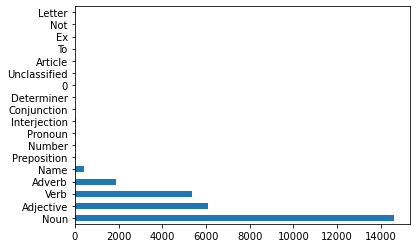

In [36]:
## TO BE COMPLETED ##
conc_df['Dom_Pos'].value_counts().plot(kind='barh')

## 5. Subframe of above-average concreteness values [2 points]

Write code to pull out the subframe of `conc_df` in which the `'Conc.M'` values are greater than the mean for those values in the entire lexicon, and store this in a variable called `mu_df`. __The resulting frame has 18,273 rows__.

In [38]:
## TO BE COMPLETED ##
mean_concm = conc_df['Conc.M'].mean()
mu_df = conc_df[conc_df['Conc.M']>mean_concm]

In [39]:
assert mu_df.shape[0] == 18273

## 6. Recalculating 'Percent_known'  [2 points]

This question asks you to create a useful `pd.Series` based on the ##conceretness lexicon. The full desired specification is given in the docstring.

In [40]:
def recalculate_percent_known(conc_df):
    """In the Concreteness lexicon, the 'Unknown' values divided by
    the 'Total' values give us the percent unknown, and 1.0 minus those
    values give us the 'Percent_known' values but at a greater level of
    precision. The current function recomputes these values.

    Parameters
    ----------
    conc_df : pd.DataFrame
        The concreteness lexicon.

    Returns
    -------
    pd.Series
        Containing the calculated percent known values
        for each word in the lexicon

    """
    ## TO BE COMPLETED ##
    
    return 1.0 - (conc_df['Unknown']/conc_df['Total'])
    

def test_recalculate_percent_known(conc_df):
    pk = recalculate_percent_known(conc_df)
    examples = [
        ('roadsweeper', 0.963),
        ('hairdress', 1.0),
        ('bobsleigh', 0.8462)]
    for ex, expected in examples:
        result = pk[ex].round(4)
        assert result == expected, \
            "For {}, expected {}; got {}".format(ex, expected, result)

In [41]:
# If your test passes, this will produce no output. If it fails,
# you'll see an assertion error:

test_recalculate_percent_known(conc_df)

## 7. Grouping by part-of-speech  [2 points]

This question asks you to use `groupby` to get the mean 'Percent_known' for each part-of-speech ('Dom_Pos' column). The return value is a `pd.Series`, and it should be sorted from largest to smallest mean 'Percent_known' value.

In [50]:
def percent_known_by_pos(conc_df):
    """Gets the mean 'Percent_known' for each part-of-speech
    ('Dom_Pos' column), and return a `pd.Series` 
    sorted from
    largest mean 'Percent_known' to smallest.

    Parameters
    ----------
    conc_df : pd.DataFrame
        The concreteness lexicon.

    Returns
    -------
    pd.Series
    """

    def mean_percent_known(grp):
        """This is the function to apply to each group.

        Parameters
        ----------
        grp : pd.DataFrame
            As created by `groupby`

        Returns
        -------
        pd.Series
            Giving the mean of the 'Percent_known' column
            in `grp`.

        """
        ## TO BE COMPLETED ##
        return grp['Percent_known'].mean()

    ## TO BE COMPLETED ##
    return conc_df.groupby(['Dom_Pos']).apply(mean_percent_known).sort_values(ascending=False)


def test_percent_known_by_pos(conc_df):
    result = percent_known_by_pos(conc_df)
    examples = (
        (0, 'To', 1.000),
        (3, 'Determiner', 0.995),
        (-1, 'Unclassified', 0.917))
    err_count = 0
    for i, pos, val in examples:
        if result.index[i] != pos:
            print("Expected {} at row {}; got {}".format(pos, i, result.index[i]))
            err_count += 1
        if pos not in result:
            print("Key {} is not present".format(pos))
            err_count += 1
        elif result.loc[pos].round(3) != val:
            print("Expected value {} for {}; got {}".format(val, pos, result.loc[pos]))
            err_count += 1
    print("test_percent_known_by_pos completed with {} errors".format(err_count))

In [51]:
result = percent_known_by_pos(conc_df)
print(result)

Dom_Pos
To              1.000000
Not             1.000000
Ex              1.000000
Determiner      0.995000
Number          0.991333
Pronoun         0.989483
Preposition     0.988730
Verb            0.976551
Conjunction     0.975926
Adverb          0.973033
Article         0.972500
Adjective       0.972266
Noun            0.972092
Interjection    0.954510
Name            0.947900
0               0.938750
Letter          0.920000
Unclassified    0.917273
dtype: float64


In [52]:
test_percent_known_by_pos(conc_df)

test_percent_known_by_pos completed with 0 errors
